# Tanay Gupta
## 200968232
## Section A
## Roll no. 55

# Movielens 100k dataset

This is a dataset obtained from Movielens, a movie recommendation service. It has over 100k ratings by 610 users across 9742 movies.
* Each user has a minimum of 20 movies rated.
* All user IDs are unique
* Movies are included only if they have a rating or a tag associated with them
* There are 18 different genres listed separated by a "|"

Our purpose is to create a recommender system based on this dataset along with a simple UI on an app. The users can search for movies and recommendations

## Tech Stack
The following libraries will be used for this system
* Pandas for manipulating data
* Matplotlib for visualisation
* Seaborn for visualisation
* Pyspark for the big data and recommender system aspect of this project

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
links = pd.read_csv('dataset/links.csv')
movies = pd.read_csv('dataset/movies.csv')
ratings = pd.read_csv('dataset/ratings.csv')
tags = pd.read_csv('dataset/tags.csv')
print(links.shape)
links.head()

(9742, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [193]:
print(movies.shape)
movies.head()

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [194]:
print(ratings.shape)
ratings.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [195]:
print(tags.shape)
tags.head()

(3683, 4)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [196]:
print(movies.info())
print(ratings.info())
print(tags.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    36

### We can see that there are no null values in the data, so we don't need to do anything there

In [197]:
ratings.drop(columns='timestamp',inplace=True)
tags.drop(columns='timestamp',inplace=True)

### We drop the timestamp columns from both ratings and tags, since it is of no use to us.

In [198]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*',expand = False)

In [199]:
movies.isna().sum()

movieId     0
title       0
genres      0
year       12
dtype: int64

In [200]:
movies['year'] = pd.to_numeric(movies['year'])

In [201]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   title    9742 non-null   object 
 2   genres   9742 non-null   object 
 3   year     9730 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 304.6+ KB


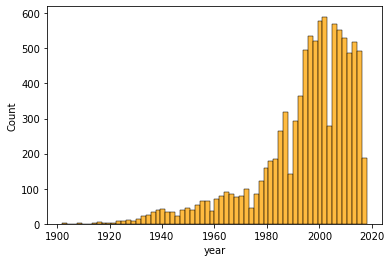

In [202]:
sns.histplot(movies['year'], kde = False, color = 'orange')
plt.show()

### We have extracted the year of release from the movie names, convert the 'year' column to numeric values and plotted a histogram showing the number of movies released each year in the dataset

In [203]:
df = movies['genres'].str.get_dummies()

In [204]:
movies = pd.concat([movies, df], 1)

/tmp/ipykernel_6534/3532345017.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  movies = pd.concat([movies, df], 1)


In [205]:
movies.head()

,movieId,title,genres,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [206]:
movies = movies.drop(['genres'], axis = 1)
movies.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Action      		1828
Adventure      		1263
Animation      		611
Children      		664
Comedy      		3756
Crime      		1199
Documentary      		440
Drama      		4361
Fantasy      		779
Film-Noir      		87
Horror      		978
IMAX      		158
Musical      		334
Mystery      		573
Romance      		1596
Sci-Fi      		980
Thriller      		1894
War      		382
Western      		167


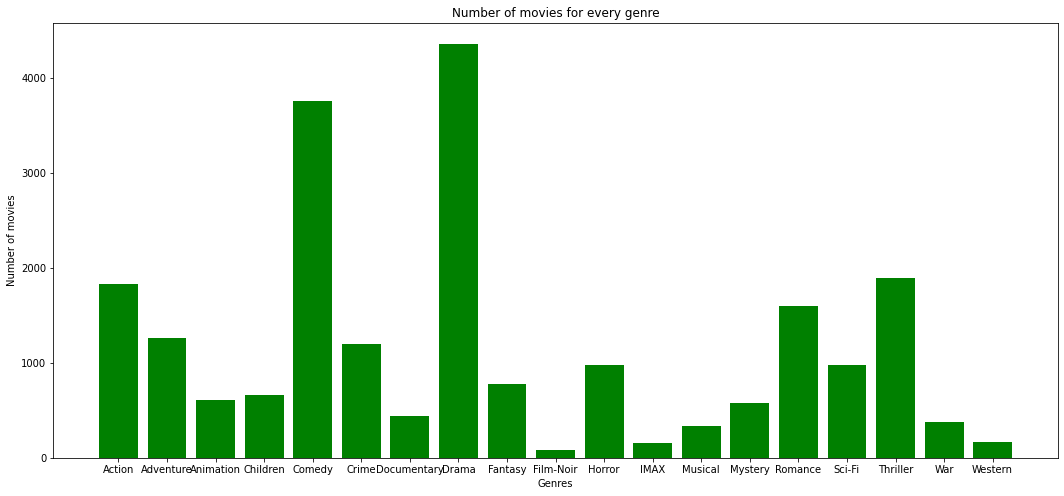

In [233]:
genre_counts = {}
for i in movies.columns[4:23]:
    genre_counts[i] = movies[i].value_counts()[1]
    print("{}      \t\t{}".format(i,x[i]))

fig, ax = plt.subplots(figsize=(18, 8))
plt.bar(height = x.values(), x = x.keys(), color = 'green')
plt.xlabel("Genres")
plt.ylabel("Number of movies")
plt.title("Number of movies for every genre")
plt.show()

### We have extracted the genres from the genres column and used one hot encoding to separate all genres. After that we drop the genres column and plot the number of movies according to genres

In [234]:
drama_movies = movies[movies['Drama'] == 1]
drama_movies.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3,4,Waiting to Exhale (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
10,11,"American President, The (1995)",1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
13,14,Nixon (1995),1995.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,16,Casino (1995),1995.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,17,Sense and Sensibility (1995),1995.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [235]:
mystery_movies = movies[movies['Mystery'] == 1]
mystery_movies.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
21,22,Copycat (1995),1995.0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
28,29,"City of Lost Children, The (Cité des enfants p...",1995.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),1995.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
43,47,Seven (a.k.a. Se7en) (1995),1995.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
46,50,"Usual Suspects, The (1995)",1995.0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [236]:
romance_movies = movies[movies['Romance'] == 1]
romance_movies.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2,3,Grumpier Old Men (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,7,Sabrina (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
10,11,"American President, The (1995)",1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
14,15,Cutthroat Island (1995),1995.0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### We see the movies where the genres are drama, mystery and romance

In [210]:
movies_ratings = ratings.merge(movies,on = 'movieId',how = 'inner')
movies_ratings

,userId,movieId,rating,title,year,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,Toy Story (1995),1995.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,Toy Story (1995),1995.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,Toy Story (1995),1995.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,Toy Story (1995),1995.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,Toy Story (1995),1995.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),1997.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100832,610,160527,4.5,Sympathy for the Underdog (1971),1971.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100833,610,160836,3.0,Hazard (2005),2005.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100834,610,163937,3.5,Blair Witch (2016),2016.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


### We have merged the ratings and movies datasets where movieId is the common column

In [213]:
most_rated = movies_ratings.groupby('title').size().sort_values(ascending=False)[:10]
most_rated.head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
dtype: int64

### 10 most rated movies and the amount of times they have been rated

<AxesSubplot:xlabel='rating', ylabel='Count'>

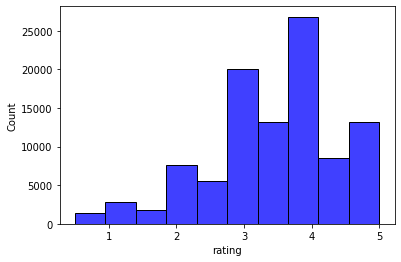

In [242]:
sns.histplot(movies_ratings['rating'], kde = False, color = 'blue', bins = 10)

### Plot of number of movies rated against different ratings